In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

n = 100

def fuzzed(n,percent):
    return n * (1 + 2*percent*0.01 * (np.random.random() - 0.5))

params = {
    'r_mean': 0,
    'r_sd': 1.5,
    'x_mean': 3,
    'x_sd': 1,
    'slope': 2,
    'intercept': 1
}

# X = number of peeps consumed
# Y = regrets

fuzzy = {key:fuzzed(params[key],5) for key in params}
print(fuzzy)



{'r_mean': 0.0, 'r_sd': 1.5194064563624106, 'x_mean': 2.8621326555223927, 'x_sd': 1.0136937964102912, 'slope': 1.9683507462366472, 'intercept': 1.0116345919940826}


In [13]:
data=[]
for a in range(n):
    residual = np.random.normal(fuzzy['r_mean'],fuzzy['r_sd'])
    x = max(0,np.random.normal(fuzzy['x_mean'],fuzzy['x_sd']))
    y = max(fuzzy['slope'] * x + fuzzy['intercept'] + residual,0)
    data.append({"x":x,"y":y,"r":residual})

#print(data)

df = pd.DataFrame.from_dict(data)
print(df.describe())
print(df.columns)


                x           y           r
count  100.000000  100.000000  100.000000
mean     2.892324    6.761287    0.056544
std      0.953153    2.409154    1.473659
min      0.471657    1.940370   -4.844828
25%      2.250785    5.070459   -0.853909
50%      2.857876    6.733967    0.211334
75%      3.461145    8.377774    1.019155
max      5.105928   12.100812    3.644612
Index(['x', 'y', 'r'], dtype='object')


Intercept    0.977235
x            1.999794
dtype: float64


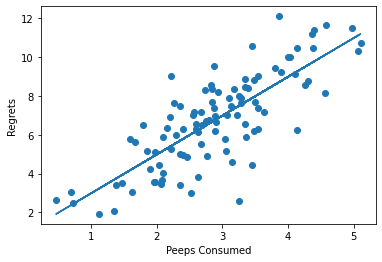

In [14]:

plt.scatter(df.x, df.y)

model = sm.OLS.from_formula('y ~ x', df).fit()
print(model.params)
b_0=model.params[0]
sl=model.params[1]
plt.plot(df.x,sl*df.x+b_0)
plt.xlabel('Peeps Consumed')
plt.ylabel('Regrets')
plt.show()